# Date - 24/10/2023

# Team ID - 3933

# Project Title - Water Quality  Analysis

# IMPORTING THE PACKAGES

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy
import plotly.express as px

# READING THE DATASET

In [31]:
df=pd.read_csv("D:\\IBM_water_quality\\water_potability.csv")
df_copy=pd.read_csv("D:\\IBM_water_quality\\water_potability.csv")

# Data Exploration

In [32]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [33]:
df_copy

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# ANALYSIS OF THE DATA

In [34]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [36]:
df.shape

(3276, 10)

In [37]:
df[df["Potability"]==0].count()

ph                 1684
Hardness           1998
Solids             1998
Chloramines        1998
Sulfate            1510
Conductivity       1998
Organic_carbon     1998
Trihalomethanes    1891
Turbidity          1998
Potability         1998
dtype: int64

In [38]:
df[df["Potability"]==1].count()

ph                 1101
Hardness           1278
Solids             1278
Chloramines        1278
Sulfate             985
Conductivity       1278
Organic_carbon     1278
Trihalomethanes    1223
Turbidity          1278
Potability         1278
dtype: int64

In [39]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [40]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# Data Pre-Processing

In [41]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


# Check for Duplicates:

In [42]:
duplicates = df.duplicated()

In [43]:
df = df.drop_duplicates()

# CLEARING THE NULL VALUES

In [44]:
df.dropna(axis=0, how='any', inplace=True)

In [45]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


# DETECTING OF OUTILERS

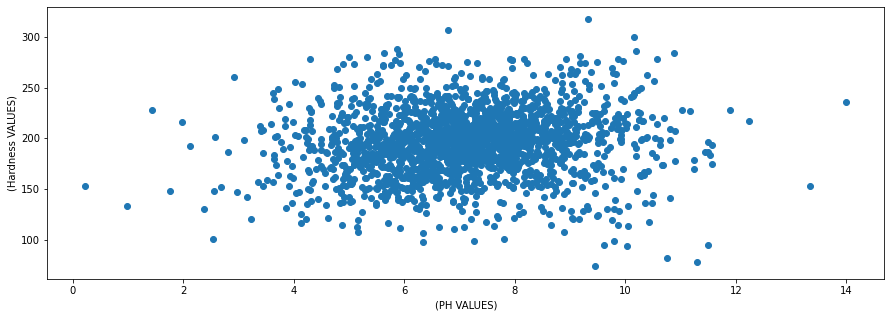

In [47]:
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(df['ph'],df['Hardness'])
ax.set_xlabel('(PH VALUES)')
ax.set_ylabel('(Hardness VALUES)')
plt.show()

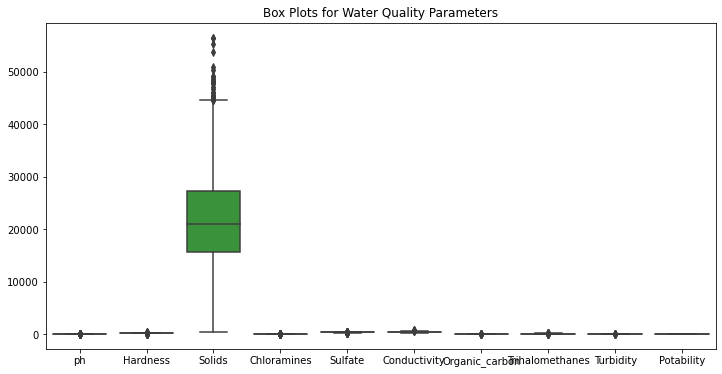

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="v")
plt.title("Box Plots for Water Quality Parameters")
plt.show()

# HANDLING OF OUTILERS

In [49]:
def clear_outliers_iqr(df, columns):
    cleaned_data = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data


outlier_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

cleaned_data = clear_outliers_iqr(df, outlier_columns)




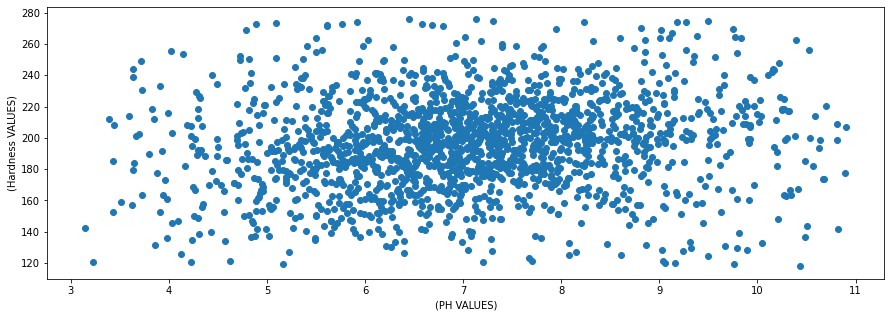

In [50]:
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(cleaned_data['ph'],cleaned_data['Hardness'])
ax.set_xlabel('(PH VALUES)')
ax.set_ylabel('(Hardness VALUES)')
plt.show()

# visualization of parameter

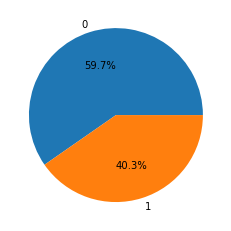

In [51]:
plt.pie(df['Potability'].value_counts(),labels = list(df['Potability'].unique()),autopct="%0.1f%%" )
plt.show()

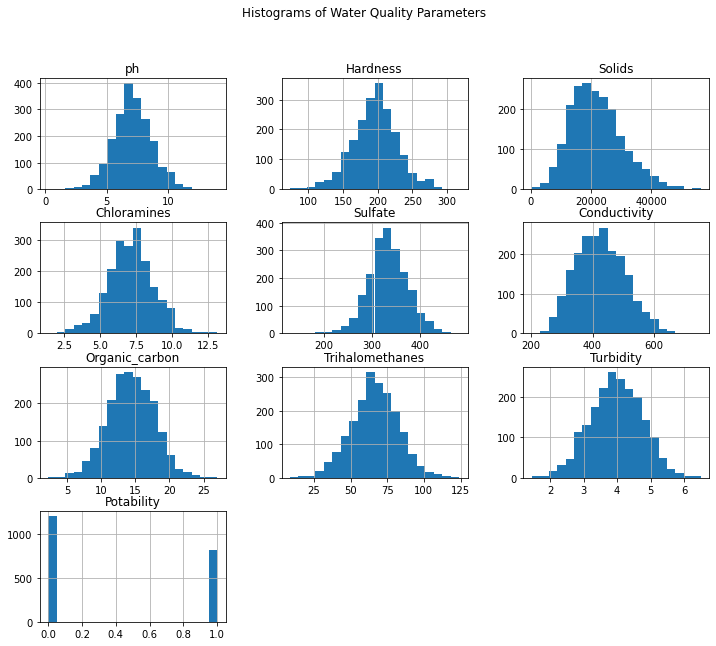

In [52]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Water Quality Parameters")
plt.show()

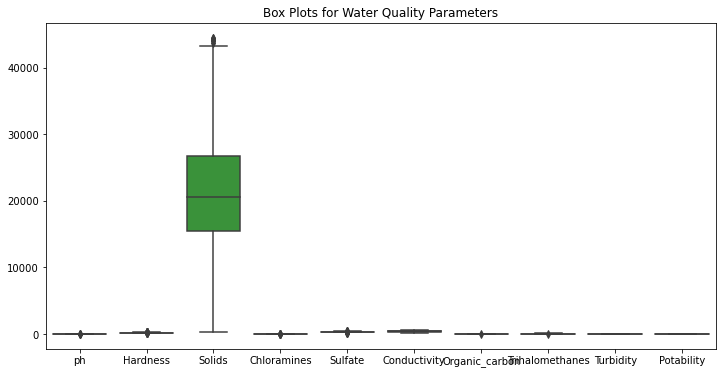

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, orient="v")
plt.title("Box Plots for Water Quality Parameters")
plt.show()

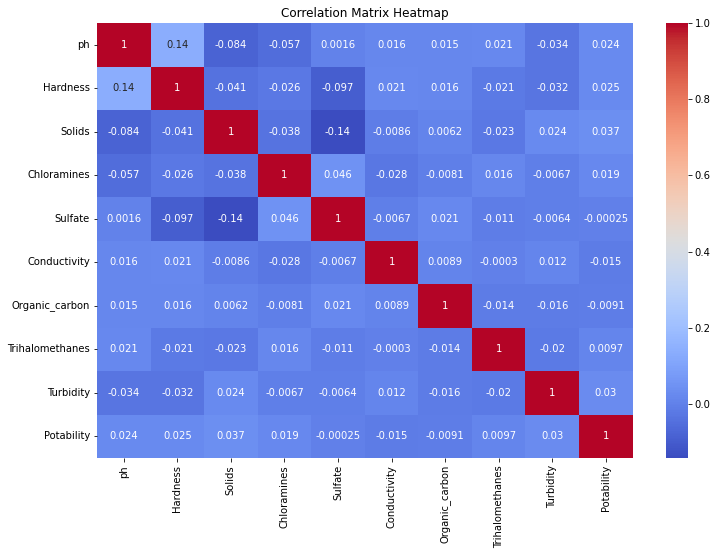

In [54]:
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


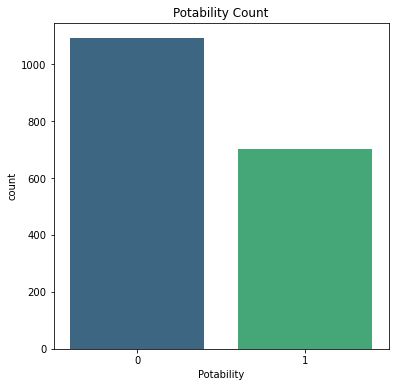

In [55]:
plt.figure(figsize=(6, 6))
sns.countplot(data=cleaned_data, x='Potability', palette='viridis')
plt.title("Potability Count")
plt.show()

In [56]:
px.histogram(cleaned_data, x="ph", color="Potability", barmode="overlay",title= "Factors Affecting Water Quality: PH")


In [57]:
px.histogram(df, x = "Hardness",color = "Potability", barmode="overlay",title= "Factors Affecting Water Quality: Hardness")

In [58]:
px.histogram(df, x = "Solids",color = "Potability", barmode="overlay",title= "Factors Affecting Water Quality: Solids")

In [59]:
px.histogram(df, x = "Solids",color = "Potability", barmode="overlay",title= "Factors Affecting Water Quality: Solids")

In [60]:
px.histogram(df, x = "Chloramines",color = "Potability", barmode="overlay",title= "Factors Affecting Water Quality: Chloramines")

In [61]:
px.histogram(df, x = "Sulfate",color = "Potability", barmode="overlay",title= "Factors Affecting Water Quality: Sulfate")

In [62]:
px.histogram(df, x = "Conductivity",color = "Potability", barmode="overlay",title= "Factors Affecting Water Quality: Conductivity")

In [63]:
px.histogram(df, x = "Organic_carbon",color = "Potability", barmode="overlay",title= "Factors Affecting Water Quality: Organic_carbon")

In [64]:
px.histogram(df, x = "Trihalomethanes",color = "Potability", barmode="overlay",title= "Factors Affecting Water Quality: Trihalomethanes")

In [65]:
px.histogram(df, x = "Turbidity",color = "Potability", barmode="overlay",title= "Factors Affecting Water Quality: Turbidity")

# potential deviations from standards. 

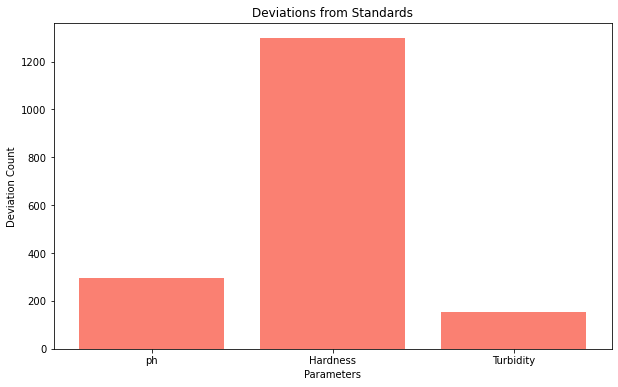

In [66]:
standards = {'ph': 8.5, 'Hardness': 180, 'Turbidity': 5.0}
deviations = {param: cleaned_data[cleaned_data[param] > standards[param]].shape[0] for param in standards}

plt.figure(figsize=(10, 6))
plt.bar(deviations.keys(), deviations.values(), color='salmon')
plt.xlabel('Parameters')
plt.ylabel('Deviation Count')
plt.title('Deviations from Standards')
plt.show()


# splitting data

In [67]:
X = cleaned_data.drop('Potability', axis= 1)
y = cleaned_data['Potability']

In [68]:
X.shape, y.shape

((1794, 9), (1794,))

In [69]:

from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 

In [70]:
X = scaler.fit_transform(X)
X

array([[ 0.86386261,  0.61381129,  0.067647  , ...,  1.24379543,
         2.18882244,  0.86456825],
       [ 1.40325271, -0.51732815, -0.43720308, ..., -0.88414929,
        -2.22263111,  0.13528336],
       [-1.036925  , -0.27214914,  0.90879949, ..., -1.86131842,
        -0.74319752, -1.86064249],
       ...,
       [ 1.33207897,  0.63672394, -0.69435973, ..., -1.39745019,
        -0.73342223,  0.84490664],
       [-0.25895051,  0.37405498, -0.52869705, ...,  0.55722775,
        -2.42398184, -0.69726042],
       [-0.69920233, -0.3283896 ,  0.58261196, ..., -0.7265731 ,
        -0.38805016, -0.39863075]])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# Selecting a predictive model 

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [74]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Support Vector Machine': SVC(kernel='rbf', random_state=0)
}


In [75]:
best_model = None
best_accuracy = 0.0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f'Best Model: {best_model} with Accuracy: {best_accuracy:.2f}')


Decision Tree Accuracy: 0.61
Random Forest Accuracy: 0.67
Support Vector Machine Accuracy: 0.70
Best Model: Support Vector Machine with Accuracy: 0.70


# 

# 

# 

# 

# 

# 

# Build a predictive model 

In [76]:
classifier = SVC(kernel='linear', random_state=0)


classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('\nAccuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)



Accuracy: {accuracy:.2f}

Confusion Matrix:
[[269   0]
 [180   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       269
           1       0.00      0.00      0.00       180

    accuracy                           0.60       449
   macro avg       0.30      0.50      0.37       449
weighted avg       0.36      0.60      0.45       449



In [77]:
df.to_csv("water_potability1", encoding = 'utf-8')